<a href="https://colab.research.google.com/github/raghobaa/mlproj/blob/main/practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

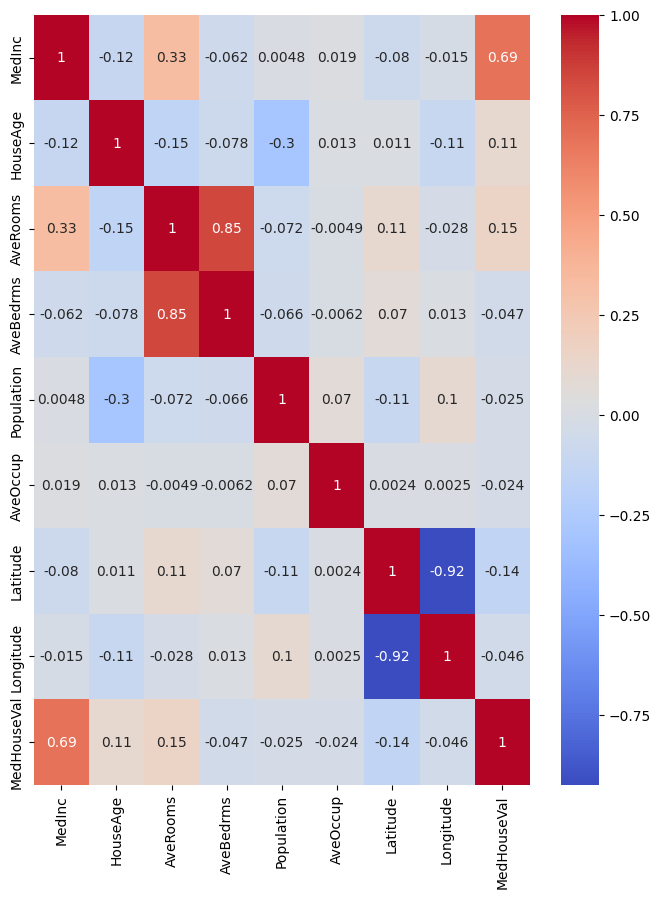

In [8]:
var=fetch_california_housing(as_frame=True)
var=var.frame
print(var)

corelationm =var.corr()
plt.figure(figsize=(8,10))
sns.heatmap(corelationm,annot=True,cmap='coolwarm')
plt.show()

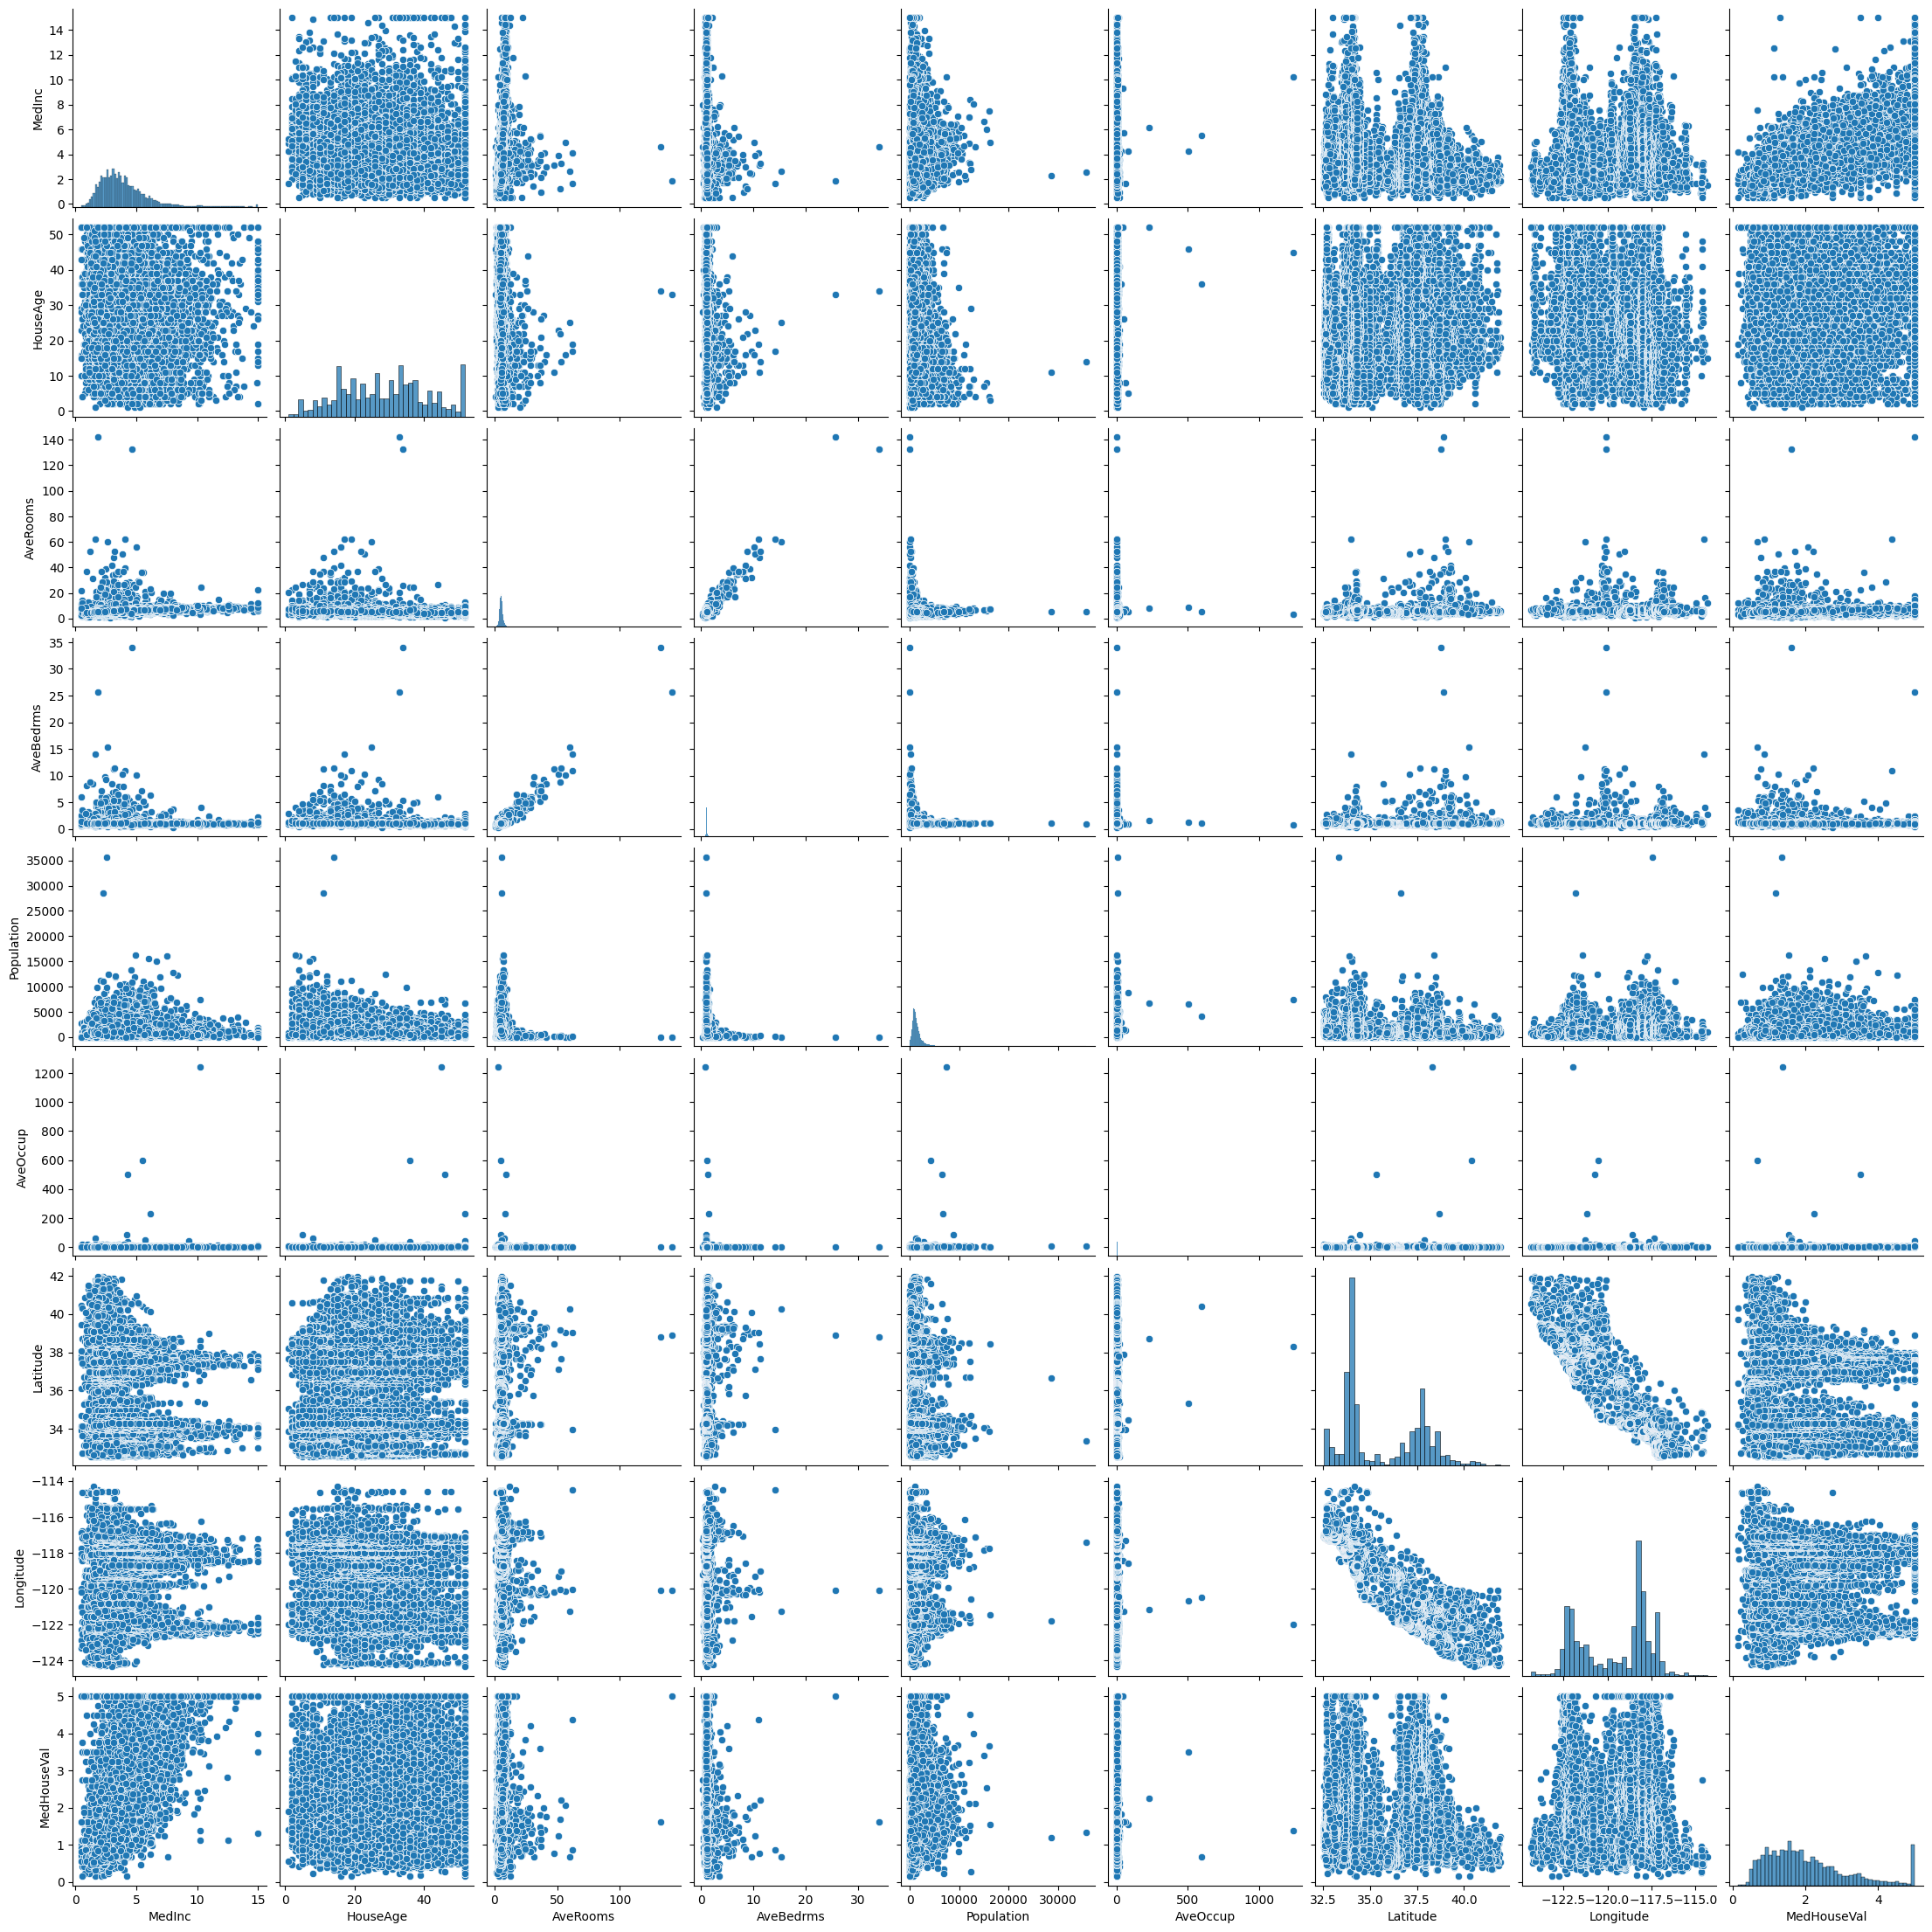

In [10]:
sns.pairplot(var)
plt.show()

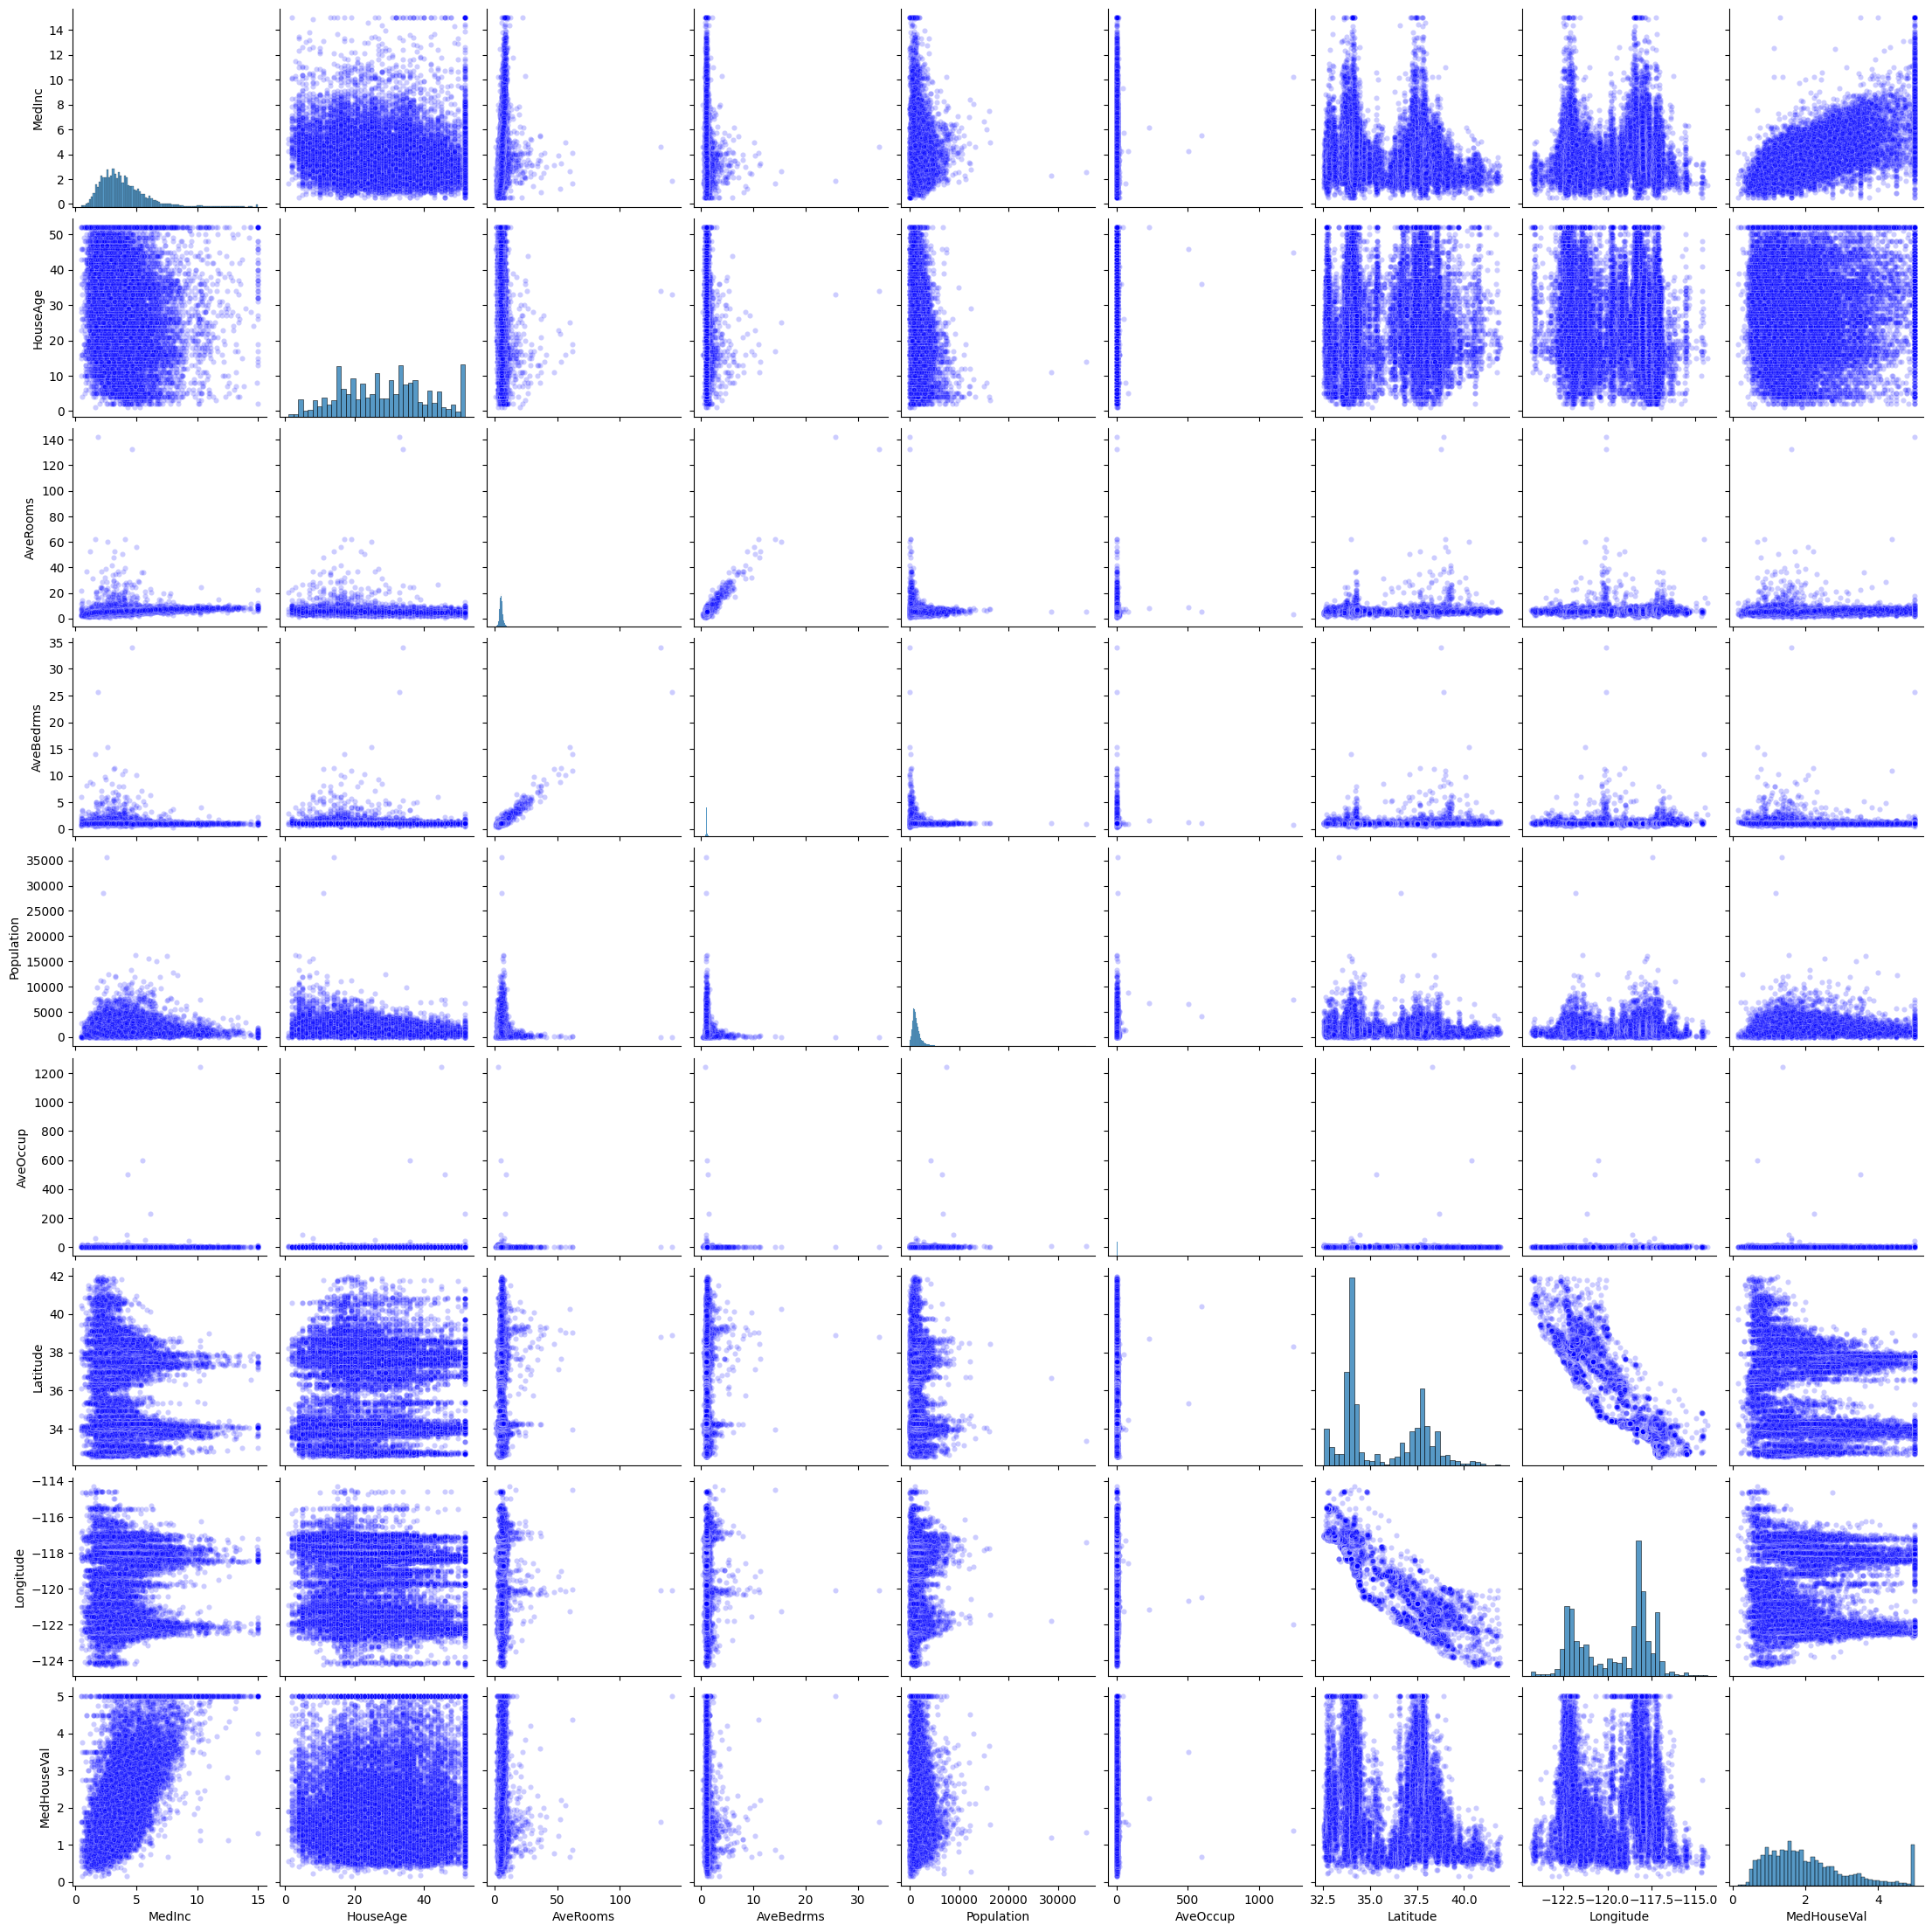

In [14]:
sns.pairplot(var, plot_kws={'alpha': 0.2, 's': 20, 'color': 'blue'})


FileNotFoundError: [Errno 2] No such file or directory: 'file_path'

In [24]:
import pandas as pd

def find_s_algorithm(file_path):

    data = pd.read_csv(file_path)

    print("Training data:")
    print(data)
    attributes = data.columns[:-1]  # All columns except the last
    class_label = data.columns[-1]  # Last column (target)

    # Initialize hypothesis with most general case
    hypothesis = ['?' for _ in attributes]

    # Iterate through the dataset
    for index, row in data.iterrows():
        if row[class_label] == 'Yes':  # Consider only positive instances
            for i, value in enumerate(row[attributes]):
                if hypothesis[i] == '?' or hypothesis[i] == value:
                    hypothesis[i] = value  # Update hypothesis
                else:
                    hypothesis[i] = '?'  # Keep '?' for conflicting values

    return hypothesis

m = find_s_algorithm("/content/training_data.csv")
print("The final hypothesis is:", m)


Training data:
    Outlook Temperature Humidity  Windy PlayTennis
0     Sunny         Hot     High  False         No
1     Sunny         Hot     High   True         No
2  Overcast         Hot     High  False        Yes
3      Rain        Cold     High  False        Yes
4      Rain        Cold     High   True         No
5  Overcast         Hot     High   True        Yes
6     Sunny         Hot     High  False         No
The final hypothesis is: ['Overcast', 'Hot', 'High', '?']


In [25]:


def find_s_algorithm(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)

    print("Training Data:")
    print(data)

    # Identify feature columns and target column
    attributes = data.columns[:-1]  # All columns except last
    class_label = data.columns[-1]  # Last column (target)

    # Initialize hypothesis with the most general case
    hypothesis = ['?' for _ in attributes]

    # Iterate through the dataset
    for index, row in data.iterrows():
        if row[class_label] == 'Yes':  # Only process positive examples
            for i, value in enumerate(row[attributes]):
                if hypothesis[i] == '?' or hypothesis[i] == value:
                    hypothesis[i] = value  # Keep the same value
                else:
                    hypothesis[i] = '?'  # Conflict → Set to '?'

    return hypothesis

# Example usage
m = find_s_algorithm("training_data.csv")
print("The final hypothesis is:", m)


Training Data:
    Outlook Temperature Humidity  Windy PlayTennis
0     Sunny         Hot     High  False         No
1     Sunny         Hot     High   True         No
2  Overcast         Hot     High  False        Yes
3      Rain        Cold     High  False        Yes
4      Rain        Cold     High   True         No
5  Overcast         Hot     High   True        Yes
6     Sunny         Hot     High  False         No
The final hypothesis is: ['Overcast', 'Hot', 'High', '?']


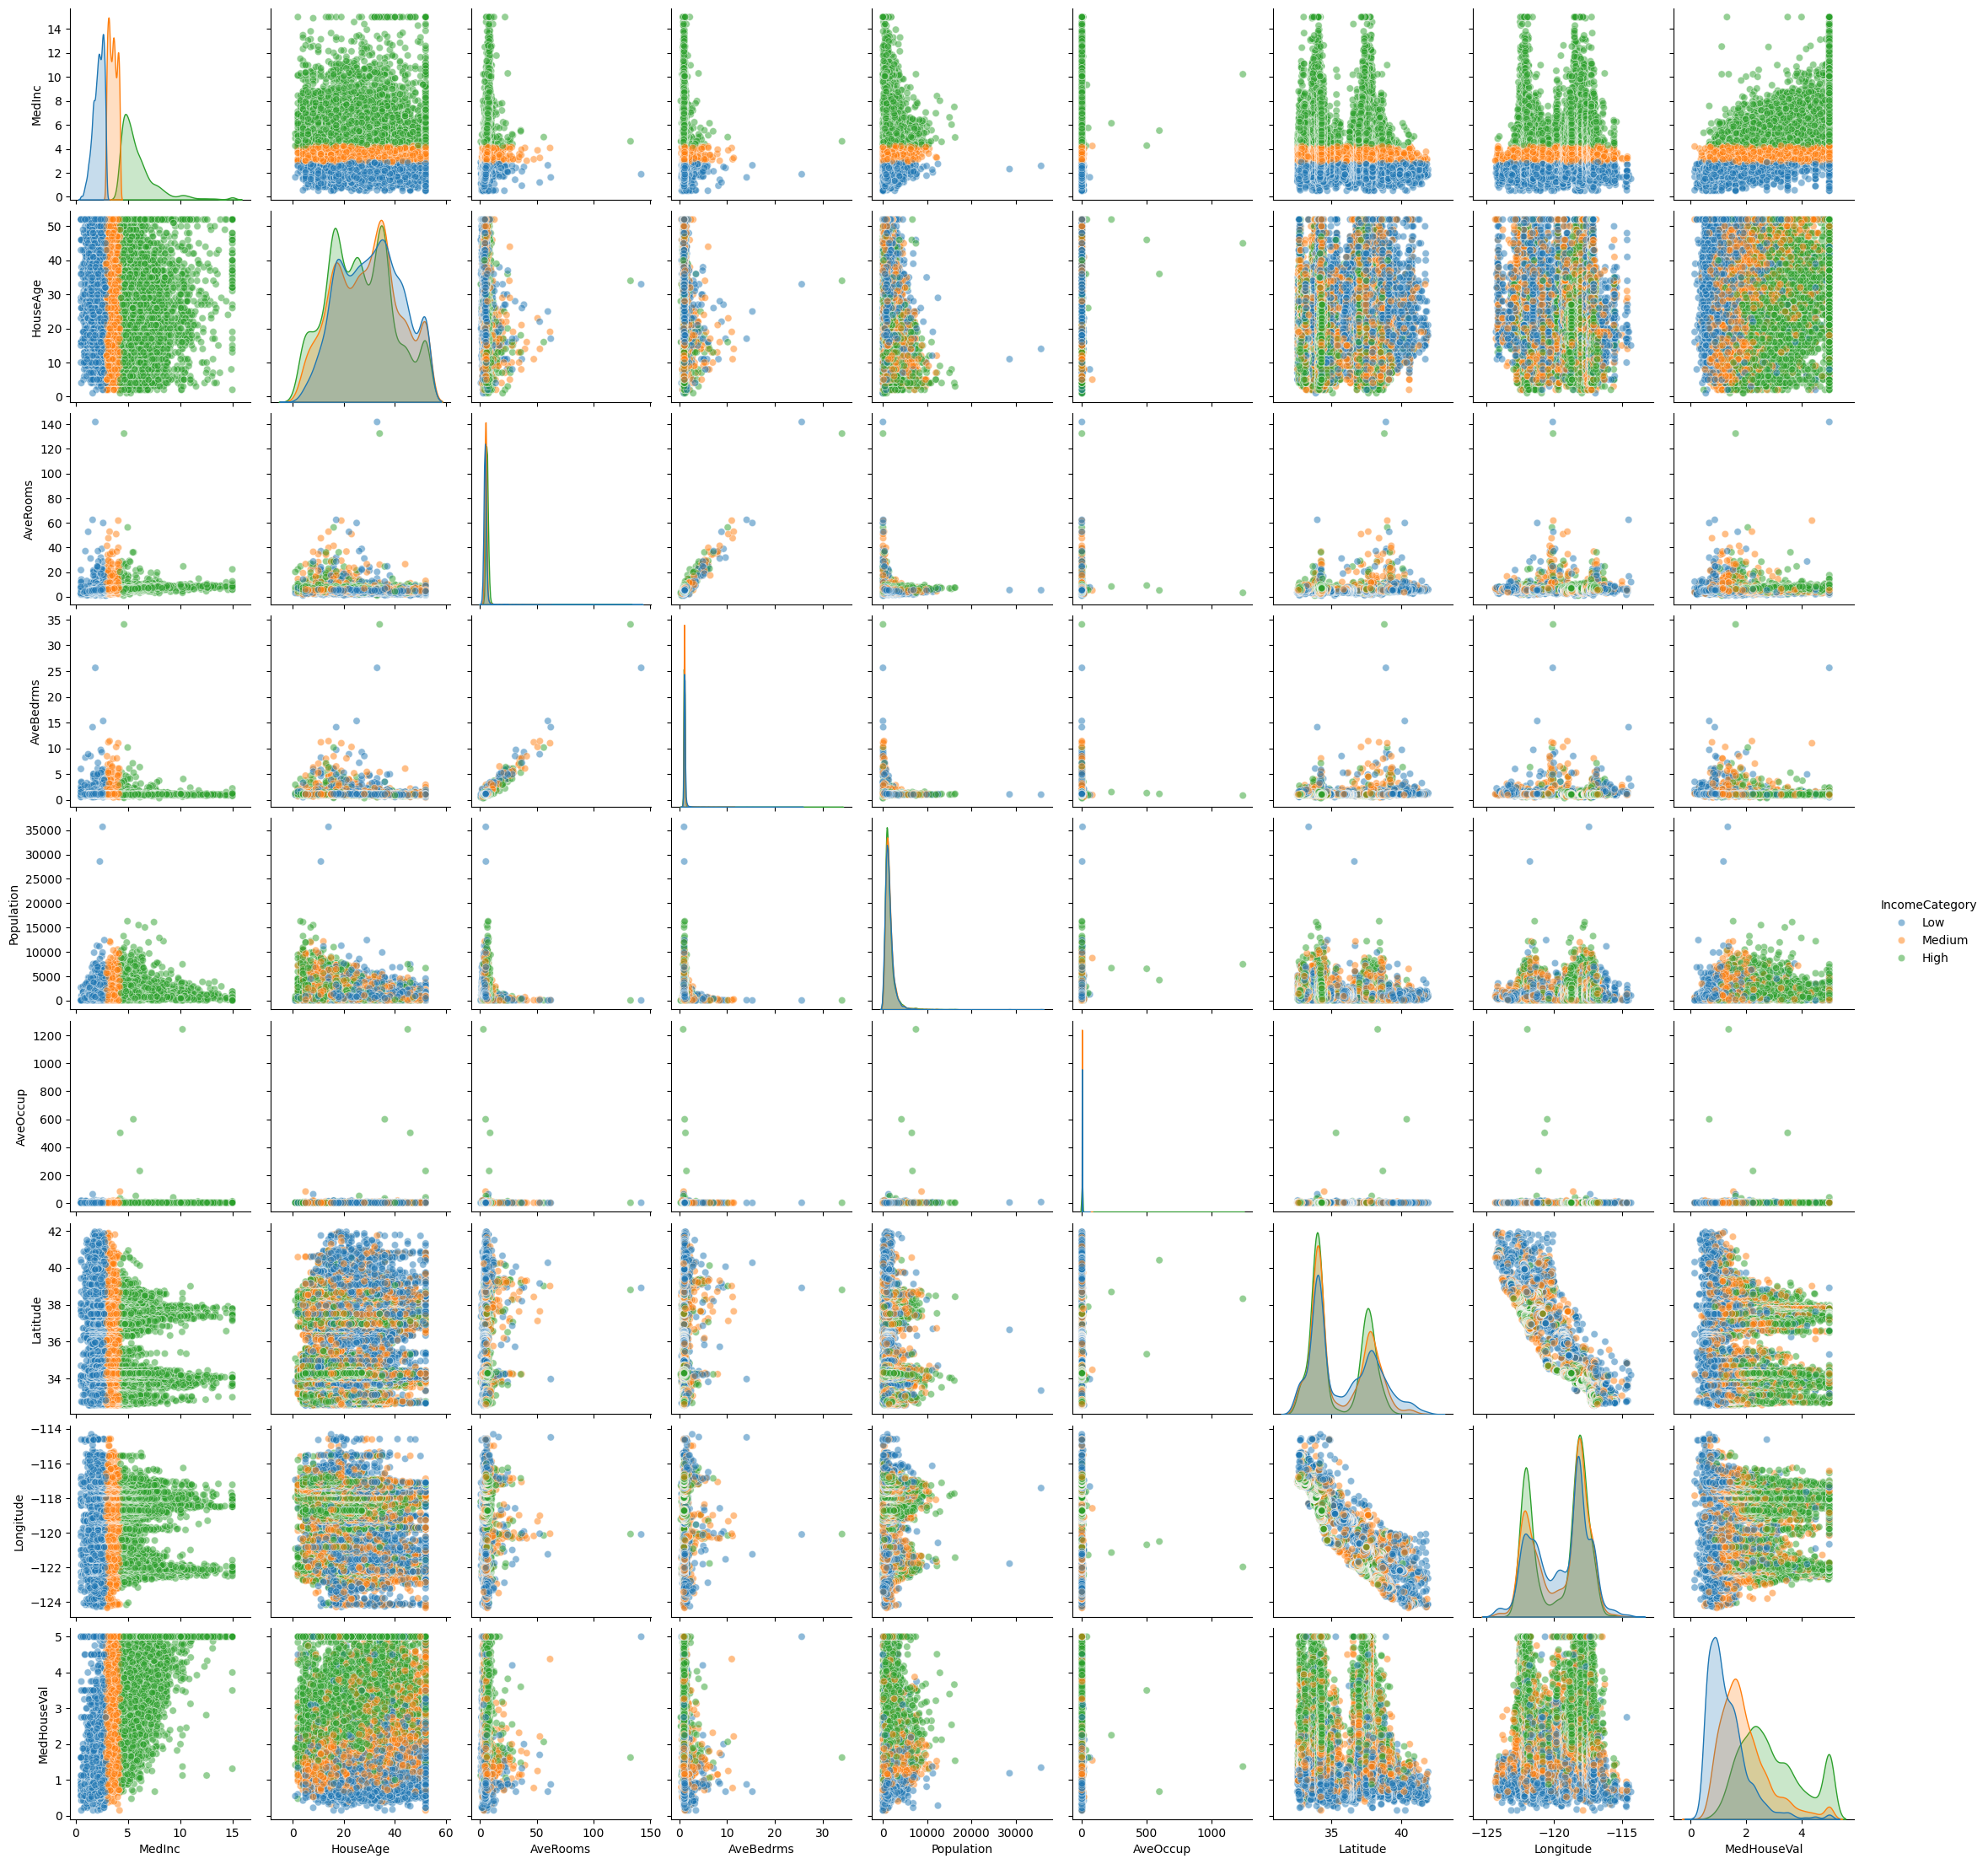

In [13]:


# Load dataset
data = fetch_california_housing(as_frame=True).frame

# Create an income category for color grouping
data["IncomeCategory"] = pd.qcut(data["MedInc"], q=3, labels=["Low", "Medium", "High"])

# Pair plot with different colors for income categories
sns.pairplot(data, hue="IncomeCategory", diag_kind="kde", plot_kws={'alpha': 0.5})


In [1]:
import torch
print(torch.cuda.is_available())
!nvidia-smi



True
Sun Mar 23 05:01:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+

In [2]:
# Install required libraries
!pip install transformers datasets torch scikit-learn tqdm pandas numpy matplotlib

# Import libraries
import os
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AutoModelForSequenceClassification
from transformers import AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
from datasets import load_dataset, Dataset as HFDataset


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install fsspec==2025.3.0



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.12.0
    Uninstalling fsspec-2024.12.0:
      Successfully uninstalled fsspec-2024.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.4.1 requires fsspec[http]<=2024.12.0,>=2023.1.0, but you have fsspec 2025.3.0 which is incompatible.


In [5]:
# Load and explore the dataset
dataset = load_dataset("abdelhakimDZ/diabetes_QA_dataset")
print(f"Dataset keys: {dataset.keys()}")
print(f"Train dataset size: {len(dataset['train'])}")

# Examine the structure of one example
print("\nExample data point:")
print(dataset['train'][0])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/310 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/161k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1075 [00:00<?, ? examples/s]

Dataset keys: dict_keys(['train'])
Train dataset size: 1075

Example data point:
{'question': 'What are some examples of calorie-free, caffeine-free liquids that individuals with diabetes can consume when sick?', 'answer': 'Examples of calorie-free, caffeine-free liquids include water, unsweetened tea, and clear broth.'}


In [6]:
# Create train, validation, and test splits
# Convert to pandas DataFrame first for easier splitting
df = dataset['train'].to_pandas()

# Create splits: 80% train, 10% validation, 10% test
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

print(f"\nAfter splitting:")
print(f"Train set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

# Convert back to Hugging Face datasets
train_dataset = HFDataset.from_pandas(train_df)
val_dataset = HFDataset.from_pandas(val_df)
test_dataset = HFDataset.from_pandas(test_df)


After splitting:
Train set size: 860
Validation set size: 107
Test set size: 108


In [7]:
# Initialize tokenizer for BERT model
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)

# Maximum combined length of question and answer
max_length = 512

# Create a custom dataset class for our QA task
class DiabetesQADataset(Dataset):
    def __init__(self, dataset, tokenizer, max_length):
        self.dataset = dataset
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        question = item['question']
        answer = item['answer']

        # Tokenize the inputs
        encoding = self.tokenizer(
            question,
            answer,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='pt'
        )

        # Remove the batch dimension added by the tokenizer
        encoding = {k: v.squeeze(0) for k, v in encoding.items()}

        # For training, we'll use next sentence prediction as a proxy task
        # Label 1 means the answer is relevant to the question
        encoding['labels'] = torch.tensor(1, dtype=torch.long)

        return encoding

# Create datasets
train_data = DiabetesQADataset(train_dataset, tokenizer, max_length)
val_data = DiabetesQADataset(val_dataset, tokenizer, max_length)
test_data = DiabetesQADataset(test_dataset, tokenizer, max_length)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [8]:
# Initialize the model for next sentence prediction (as a proxy for QA)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Create DataLoaders
batch_size = 8

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Set up optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)

# Calculate total steps
epochs = 3
total_steps = len(train_dataloader) * epochs
warmup_steps = int(0.1 * total_steps)

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=warmup_steps,
    num_training_steps=total_steps
)

# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Using device: cuda


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [9]:
# To store metrics
train_losses = []
val_losses = []

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")

    # Training phase
    model.train()
    train_loss = 0
    progress_bar = tqdm(train_dataloader, desc="Training")

    for batch in progress_bar:
        # Move batch to device
        batch = {k: v.to(device) for k, v in batch.items()}

        # Clear previous gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(**batch)
        loss = outputs.loss

        # Track loss
        train_loss += loss.item()
        progress_bar.set_postfix({"loss": loss.item()})

        # Backward pass
        loss.backward()

        # Update parameters
        optimizer.step()
        scheduler.step()

    # Calculate average training loss
    avg_train_loss = train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)
    print(f"Average training loss: {avg_train_loss:.4f}")

    # Validation phase
    model.eval()
    val_loss = 0
    progress_bar = tqdm(val_dataloader, desc="Validation")

    with torch.no_grad():
        for batch in progress_bar:
            # Move batch to device
            batch = {k: v.to(device) for k, v in batch.items()}

            # Forward pass
            outputs = model(**batch)
            loss = outputs.loss

            # Track loss
            val_loss += loss.item()
            progress_bar.set_postfix({"loss": loss.item()})

    # Calculate average validation loss
    avg_val_loss = val_loss / len(val_dataloader)
    val_losses.append(avg_val_loss)
    print(f"Average validation loss: {avg_val_loss:.4f}")


Epoch 1/3


Training: 100%|██████████| 108/108 [01:13<00:00,  1.48it/s, loss=0.00385]


Average training loss: 0.1859


Validation: 100%|██████████| 14/14 [00:02<00:00,  4.71it/s, loss=0.00323]


Average validation loss: 0.0032

Epoch 2/3


Training: 100%|██████████| 108/108 [01:13<00:00,  1.46it/s, loss=0.00209]


Average training loss: 0.0027


Validation: 100%|██████████| 14/14 [00:02<00:00,  4.68it/s, loss=0.00145]


Average validation loss: 0.0015

Epoch 3/3


Training: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s, loss=0.00165]


Average training loss: 0.0016


Validation: 100%|██████████| 14/14 [00:03<00:00,  4.63it/s, loss=0.00116]

Average validation loss: 0.0012



Saving model to ./bert_finetuned_diabetes_qa


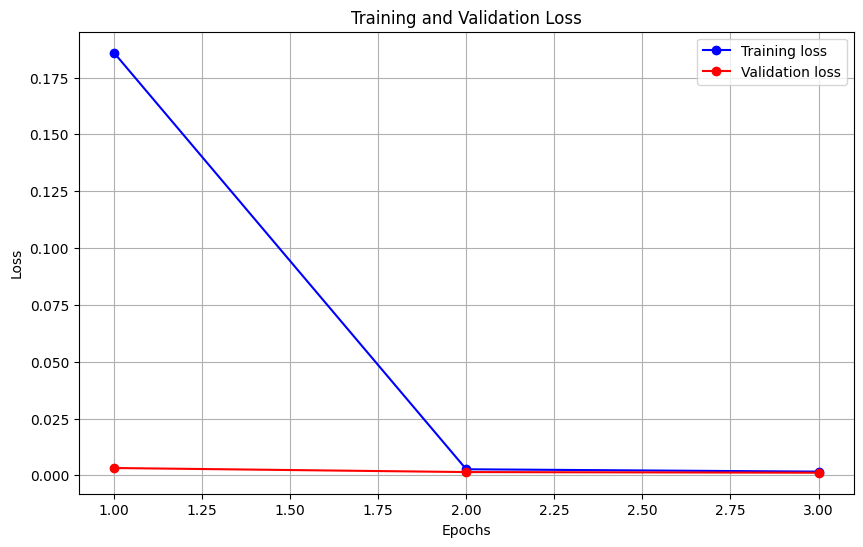

In [10]:
# Save the fine-tuned model
output_dir = "./bert_finetuned_diabetes_qa"
os.makedirs(output_dir, exist_ok=True)

print(f"\nSaving model to {output_dir}")
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Visualize training progress
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), train_losses, 'b-o', label='Training loss')
plt.plot(range(1, epochs+1), val_losses, 'r-o', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'training_loss.png'))

In [11]:
# Evaluate on test set
model.eval()
test_loss = 0

progress_bar = tqdm(test_dataloader, desc="Testing")

with torch.no_grad():
    for batch in progress_bar:
        # Move batch to device
        batch = {k: v.to(device) for k, v in batch.items()}

        # Forward pass
        outputs = model(**batch)
        loss = outputs.loss

        # Track loss
        test_loss += loss.item()
        progress_bar.set_postfix({"loss": loss.item()})

avg_test_loss = test_loss / len(test_dataloader)
print(f"\nTest loss: {avg_test_loss:.4f}")

Testing: 100%|██████████| 14/14 [00:03<00:00,  4.21it/s, loss=0.00111]


Test loss: 0.0011


In [12]:
# Prepare a model for generative QA
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, pipeline

print("\nTraining a sequence-to-sequence model for generative QA...")

# Initialize a T5 model for sequence-to-sequence
model_name = "t5-base"
seq2seq_tokenizer = AutoTokenizer.from_pretrained(model_name)
seq2seq_model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Create a dataset for seq2seq training
class DiabetesSeq2SeqDataset(Dataset):
    def __init__(self, dataset, tokenizer, max_length):
        self.dataset = dataset
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        question = item['question']
        answer = item['answer']

        # Format input as "question: {question}"
        input_text = f"question: {question}"

        # Tokenize input and output
        input_encoding = self.tokenizer(
            input_text,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='pt'
        )

        output_encoding = self.tokenizer(
            answer,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='pt'
        )

        # Create the labels for seq2seq training
        input_ids = input_encoding['input_ids'].squeeze()
        attention_mask = input_encoding['attention_mask'].squeeze()
        labels = output_encoding['input_ids'].squeeze()

        # Replace padding tokens in labels with -100 so they're ignored in loss calculation
        labels[labels == self.tokenizer.pad_token_id] = -100

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': labels
        }


Training a sequence-to-sequence model for generative QA...


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [14]:
# Create seq2seq datasets
train_seq2seq = DiabetesSeq2SeqDataset(train_dataset, seq2seq_tokenizer, max_length)
val_seq2seq = DiabetesSeq2SeqDataset(val_dataset, seq2seq_tokenizer, max_length)

# Create DataLoaders
seq2seq_batch_size = 4  # Smaller batch size for larger model
train_seq2seq_loader = DataLoader(train_seq2seq, batch_size=seq2seq_batch_size, shuffle=True)
val_seq2seq_loader = DataLoader(val_seq2seq, batch_size=seq2seq_batch_size)

# Fine-tune the seq2seq model
seq2seq_model.to(device)
seq2seq_optimizer = AdamW(seq2seq_model.parameters(), lr=5e-5)

# Calculate total steps
seq2seq_epochs = 3
total_seq2seq_steps = len(train_seq2seq_loader) * seq2seq_epochs
warmup_seq2seq_steps = int(0.1 * total_seq2seq_steps)

seq2seq_scheduler = get_linear_schedule_with_warmup(
    seq2seq_optimizer,
    num_warmup_steps=warmup_seq2seq_steps,
    num_training_steps=total_seq2seq_steps
)

In [15]:
# Train the seq2seq model
seq2seq_train_losses = []
seq2seq_val_losses = []

for epoch in range(seq2seq_epochs):
    print(f"\nSeq2Seq Epoch {epoch+1}/{seq2seq_epochs}")

    # Training phase
    seq2seq_model.train()
    train_loss = 0
    progress_bar = tqdm(train_seq2seq_loader, desc="Training Seq2Seq")

    for batch in progress_bar:
        # Move batch to device
        batch = {k: v.to(device) for k, v in batch.items()}

        # Clear previous gradients
        seq2seq_optimizer.zero_grad()

        # Forward pass
        outputs = seq2seq_model(**batch)
        loss = outputs.loss

        # Track loss
        train_loss += loss.item()
        progress_bar.set_postfix({"loss": loss.item()})

        # Backward pass
        loss.backward()

        # Update parameters
        seq2seq_optimizer.step()
        seq2seq_scheduler.step()

    # Calculate average training loss
    avg_train_loss = train_loss / len(train_seq2seq_loader)
    seq2seq_train_losses.append(avg_train_loss)
    print(f"Average seq2seq training loss: {avg_train_loss:.4f}")

    # Validation phase
    seq2seq_model.eval()
    val_loss = 0
    progress_bar = tqdm(val_seq2seq_loader, desc="Validating Seq2Seq")

    with torch.no_grad():
        for batch in progress_bar:
            # Move batch to device
            batch = {k: v.to(device) for k, v in batch.items()}

            # Forward pass
            outputs = seq2seq_model(**batch)
            loss = outputs.loss

            # Track loss
            val_loss += loss.item()
            progress_bar.set_postfix({"loss": loss.item()})

    # Calculate average validation loss
    avg_val_loss = val_loss / len(val_seq2seq_loader)
    seq2seq_val_losses.append(avg_val_loss)
    print(f"Average seq2seq validation loss: {avg_val_loss:.4f}")


Seq2Seq Epoch 1/3


Training Seq2Seq: 100%|██████████| 215/215 [03:43<00:00,  1.04s/it, loss=2.27]


Average seq2seq training loss: 2.4712


Validating Seq2Seq: 100%|██████████| 27/27 [00:10<00:00,  2.63it/s, loss=1.91]


Average seq2seq validation loss: 1.9247

Seq2Seq Epoch 2/3


Training Seq2Seq: 100%|██████████| 215/215 [03:46<00:00,  1.05s/it, loss=1.96]


Average seq2seq training loss: 2.0405


Validating Seq2Seq: 100%|██████████| 27/27 [00:10<00:00,  2.63it/s, loss=1.78]


Average seq2seq validation loss: 1.8268

Seq2Seq Epoch 3/3


Training Seq2Seq: 100%|██████████| 215/215 [03:46<00:00,  1.05s/it, loss=1.74]


Average seq2seq training loss: 1.9190


Validating Seq2Seq: 100%|██████████| 27/27 [00:10<00:00,  2.62it/s, loss=1.74]

Average seq2seq validation loss: 1.7983



Saving seq2seq model to ./t5_finetuned_diabetes_qa


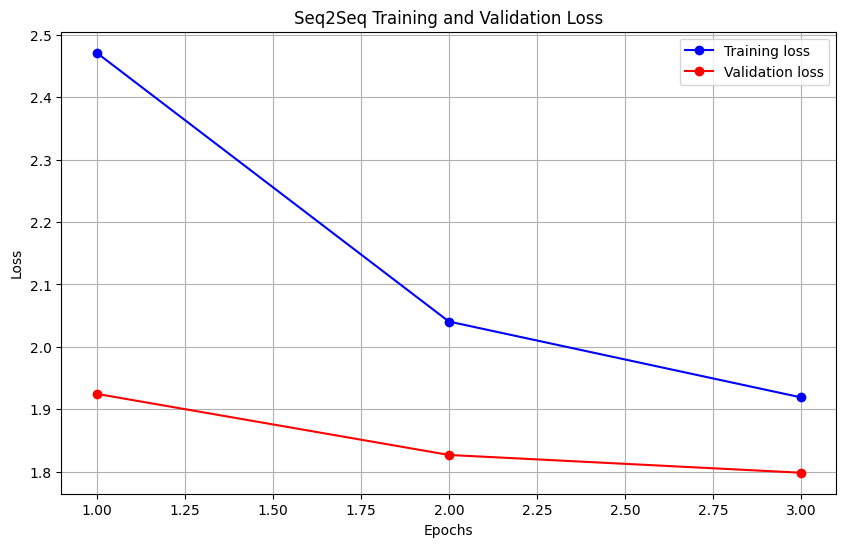

In [16]:
# Save the seq2seq model
seq2seq_output_dir = "./t5_finetuned_diabetes_qa"
os.makedirs(seq2seq_output_dir, exist_ok=True)

print(f"\nSaving seq2seq model to {seq2seq_output_dir}")
seq2seq_model.save_pretrained(seq2seq_output_dir)
seq2seq_tokenizer.save_pretrained(seq2seq_output_dir)

# Visualize seq2seq training progress
plt.figure(figsize=(10, 6))
plt.plot(range(1, seq2seq_epochs+1), seq2seq_train_losses, 'b-o', label='Training loss')
plt.plot(range(1, seq2seq_epochs+1), seq2seq_val_losses, 'r-o', label='Validation loss')
plt.title('Seq2Seq Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(seq2seq_output_dir, 'seq2seq_training_loss.png'))

In [23]:
# Create a function to answer questions
def answer_diabetes_question(question):
    # Format the input
    input_text = f"question: {question}"

    # Tokenize the input
    inputs = seq2seq_tokenizer(input_text, return_tensors="pt").to(device)

    # Generate the answer
    outputs = seq2seq_model.generate(
        inputs["input_ids"],
        max_length=100,
        num_beams=4,
        early_stopping=True
    )

    # Decode the answer
    answer = seq2seq_tokenizer.decode(outputs[0], skip_special_tokens=True)

    return answer

# Test the model with sample questions
sample_questions = [
    "What are the symptoms of type 2 diabetes?",
    "How is diabetes diagnosed?",
    "What diet is recommended for diabetic patients?",
    "how much water should i drink if i have diabities"
]

print("\nTesting the seq2seq model with sample questions:")
for question in sample_questions:
    print(f"\nQuestion: {question}")
    answer = answer_diabetes_question(question)
    print(f"Answer: {answer}")


Testing the seq2seq model with sample questions:

Question: What are the symptoms of type 2 diabetes?
Answer: Answer: Type 2 diabetes is characterized by high blood sugar levels, high blood sugar levels, and high blood sugar levels.

Question: How is diabetes diagnosed?
Answer: Diabetes is a condition that affects the body's ability to regulate blood sugar levels, leading to a higher risk of developing type 2 diabetes.

Question: What diet is recommended for diabetic patients?
Answer: Answer: Diabetic patients should eat a balanced diet, including a balanced diet, a balanced exercise program, and a balanced diet.

Question: how much water should i drink if i have diabities
Answer: Answer: If i have diabities, how much water should i drink?
